
# Comment évaluer la qualité du clustering ?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline  
from sklearn import datasets 

**Question** Reprendre le précédent TP pour générer deux datasets avec 500 points : un avec 3 blobs et un avec 2 lunes.

**Question** Lancer les quatre algorithmes de clustering du précédent TP sur ces datasets.

L'évaluation du clustering est complexe car on n'a généralement pas de supervision, on ne peut donc généralement pas confronter nos résultats à une réalité comme en apprentissage supervisé.

Si on connait toutefois le clustering qu'on devrait obtenir, on peut comparer ce qui a été calculé à ce qu'on aurait dû obtenir. Mais déjà cette comparaison n'est pas simple. Il faut aligner les partitions calculées par l'algorithme de clustering et celle de référence attendue. L'alignement peut se faire par une variante de l'algorithme [Hongrois](https://en.wikipedia.org/wiki/Hungarian_algorithm). D'autres façons proposent de passer par des mesures de la théorie de l'information ou bien de simple classification binaire des couples de données (1 pour les couples de même cluster, 0 pour les autres couples).    

Une façon de comparer des clustering est de calculer le *Rand Index*. On définit, pour deux clusterings $C_1 = (X_1, \dots, X_K)$ et $C_2 = (Y_1, \dots, Y_L)$,
* $a$, le nombre de paires d'éléments groupés dans $C_1$ et également groupés dans $C_2$ ;
* $b$, le nombre de paires d'éléments séparés dans $C_1$ et séparés dans $C_2$ ;
* $c$, le nombre de paires d'éléments séparés dans $C_1$ et mais groupés dans $C_2$ ;
* $d$, le nombre de paires d'éléments groupés dans $C_1$ et mais séparés dans $C_2$.

On a alors $RandIndex(C_1, C_2) = \frac{a + b}{a + b + c + d}$.

**Question** Avec deux clusterings $C_1=(\{1,2,3\}, \{4,5,6\})$ et $C_2=(\{1,2,6\}, \{4,5,3\})$ calculez le randindex.

*Réponse* 


**Question** Pourquoi cet indice semble bien rendre compte de la similarité entre deux clusterings ? Quelles valeurs peut-il prendre et quelles valeurs indiquent un bon clustering ?

*Réponse* 

En pratique, on utilise plutôt l'Adjusted Rand Index (ARI), qui se généralise mieux et qui se définit à partir de la matrice de contingence. Les éléments de cette matrice seront notés $n_{ij}$ tels que $n_{ij} = | X_i \cap Y_i |$. On note $a_i$ la somme de la ligne $i$ et $b_j$ la somme de la colonne $j$ de cette matrice.

La matrice a donc cette forme :
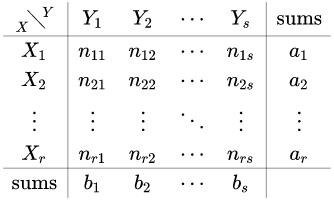

L'indice de Rand ajusté est alors :

$$ ARI = \frac{\sum_{ij} { n_{ij} \choose 2 } - \left( \sum_i { a_i \choose 2 } \right) \left( \sum_j { b_j \choose 2} \right) \Large{/}\normalsize { n \choose 2 }}{ \frac 12 \left( \sum_i { a_i \choose 2 } + \sum_j { b_j \choose 2 } \right) - \left( \sum_i { a_i \choose 2 } \right) \left( \sum_j { b_j \choose 2} \right) \Large{/}\normalsize { n \choose 2 }}.$$

La notation $n \choose p$ (qui s'écrit souvent $C_n^p$ en France) signifie le nombre de combinaisons consistant à prendre $p$ éléments parmis $n$. La définition complète de cet indice ajusté se trouve par exemple ici : https://en.wikipedia.org/wiki/Rand_index#Adjusted_Rand_index.

**Petit exercice de programmation numpy!** On va écrire une fonction ARI qui prend en argument deux clusterings sous la forme de deux 1-d arrays d'entiers de même longueur et calcule l'adjusted rand index pour les méthodes de clustering utilisées dans le TP de clustering.

exemples : 

- ARI([1, 1, 3, 2], [2, 2, 1, 3]) vaut 1 car les deux clusterings sont égaux au renommage près des clusters.
- ARI([1, 3, 3, 2], [2, 2, 1, 3]) vaut -0.2 environ

Pour implémenter ce calcul, on peut utiliser des fonctions universelles (`ufunc`). Ces fonctions sont des fonctions qui peuvent être appliquées à des `array` de `numpy`, et permettent d'appliquer une fonction à chaque élément d'un tableau efficacement.

On définit ces fonctions en utilisant la fonction `np.vectorize`, ainsi, pour une fonction `f`, `np.vectorize(f)` est une fonction qui permet d'appliquer `f` à tous les éléments d'un `array`.

**Question** Utiliser une `ufunc` pour calculer le carré de tous les éléments d'une liste.

**Question** Écrire cette fonction ARI.

**Question** Calculer les scores ARI sur les 4 algorithmes et les 2 jeux de données avec votre fonction.

**Question** Comparer les valeurs obtenues avec celles de `sklearn.metrics.adjusted_rand_score`.

**Question** Pour KMeans et SpectralClustering, tracer une courbe de la valeur de l'ARI en fonction du nombre de clusters sur les données blobs et moons.

Si l'on a pas de clusters de référence, on peut toutefois essayer de mesurer l'homogénéité des clusters obtenus, par exemple en utilisant le score de silhouette. À chaque point $x$ on attribue un score calculé à partir de la distance intra-cluster $d_i(x)$ (distance moyenne du point $x$ aux autres points de son cluster) et de la distance extra-cluster $d_e(x)$ (distance moyenne du point $x$ aux points du cluster le plus proche*).

La silhouette d'un dataset $X$ est la moyenne des silhouette de chacun des points : $silhouette(X) = \frac{1}{|X|} \sum_{x\in X} \frac{d_e(x) - d_i(x)}{\max(d_i(x), d_e(x))}$. On remarque bien que plus ce score est petit, plus les clusters semblent "bien séparés."

Voir https://en.wikipedia.org/wiki/Silhouette_(clustering).

\*ici, le cluster le plus proche est le cluster pour lequel la distance moyenne entre $x$ et les points du cluster est minimale.

**Question** Définir une fonction qui calcule la silhouette, puis calculer les valeurs de silhouette pour les méthodes utilisées dans ce TP.

Pour faire ce calcul, on pourra commencer par calculer la matrice qui contient les distances entre les paires d'éléments (voir plus haut), puis s'en servir pour calculer les distances intra et inter cluster définies ci-dessus pour chacun des points.

**Question** Comparer les valeurs obtenues avec celles de `sklearn.metrics.silhouette_score`.

**Question** Pour k-means, tracer une courbe de la valeur de la silhouette en fonction du nombre de clusters sur les données blobs et moons.

**Question** Que pouvez vous conclure de ces courbes? 

*Réponse*